In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("../input/lung-cancer/survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

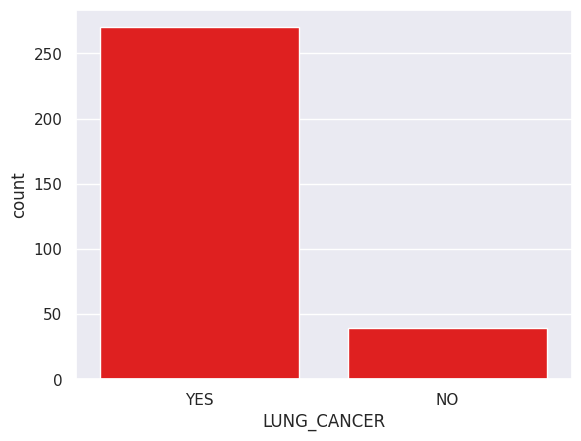

In [6]:
sns.set()
sns.countplot(data=df,x="LUNG_CANCER",color="red")

In [7]:
encoder=LabelEncoder()

In [8]:
df["LUNG_CANCER"]=encoder.fit_transform(df["LUNG_CANCER"])
df["GENDER"]=encoder.fit_transform(df["GENDER"])

In [9]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1
305,1,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1
306,1,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1
307,1,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1


In [10]:
x=df.drop("LUNG_CANCER",axis=1)
y=df["LUNG_CANCER"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [12]:
sc=StandardScaler()

In [13]:
X_train_scaled=sc.fit_transform(X_train)
x_test_scaled=sc.fit_transform(X_test)

# LogisticRegression model

In [14]:
classifer1=LogisticRegression()

In [15]:
classifer1.fit(X_train_scaled,y_train)

LogisticRegression()

In [16]:
classifer1.score(X_train_scaled,y_train)

0.9271255060728745

In [17]:
classifer1.score(x_test_scaled,y_test)

0.9354838709677419

In [18]:
y_pred=classifer1.predict(x_test_scaled)

In [19]:
pd.DataFrame({"y_pred":y_pred,"y_test":y_test})

,y_pred,y_test
288,1,1
9,1,1
57,1,1
60,1,1
25,1,1
...,...,...
198,1,1
195,1,1
210,0,1
224,1,1


In [20]:
classfier3=LogisticRegression(C=1,penalty="l2")

In [21]:
classfier3.fit(X_train_scaled,y_train)

LogisticRegression(C=1)

In [22]:
classfier3.score(X_train_scaled,y_train)

0.9271255060728745

In [23]:
classfier3.score(x_test_scaled,y_test)

0.9354838709677419

In [24]:
y_pred=classfier3.predict(x_test_scaled)

In [25]:
y_pred=classfier3.predict(x_test_scaled)

In [26]:
pd.DataFrame({"y_pred":y_pred,"y_test":y_test})

,y_pred,y_test
288,1,1
9,1,1
57,1,1
60,1,1
25,1,1
...,...,...
198,1,1
195,1,1
210,0,1
224,1,1


In [27]:
score_train=[]
score_test=[]
i=0.1
while i<1:
     classifer2=LogisticRegression(C=i)
     classifer2.fit(X_train_scaled,y_train)
     score_train.append(classifer2.score(X_train_scaled,y_train))
     score_test.append(classifer2.score(x_test_scaled,y_test))
     i=i+0.1

In [28]:
print(score_train)
print(score_test)

[0.9149797570850202, 0.9230769230769231, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745, 0.9271255060728745]
[0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9516129032258065, 0.9516129032258065, 0.9516129032258065, 0.9354838709677419, 0.9354838709677419]


# knn model

In [29]:
score_train=[]
score_test=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    score_train.append(knn.score(X_train_scaled,y_train))
    score_test.append(knn.score(x_test_scaled,y_test))
    

[]

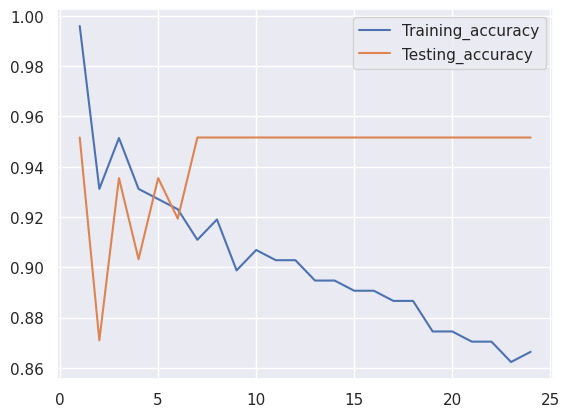

In [30]:
x=[i for i in range(1,25)]
plt.plot(x,score_train,label='Training_accuracy')
plt.plot(x,score_test,label='Testing_accuracy')
plt.legend()
plt.plot()

# svm model

In [31]:
classifer4=SVC()

In [32]:
classifer4.fit(X_train_scaled,y_train)

SVC()

In [33]:
classifer4.score(X_train_scaled,y_train)

0.9473684210526315

In [34]:
classifer4.score(x_test_scaled,y_test)

0.9354838709677419

In [35]:
classifer5=SVC(C=0.1,kernel="rbf")

In [36]:
classifer5.fit(X_train_scaled,y_train)

SVC(C=0.1)

In [37]:
classifer5.score(X_train_scaled,y_train)

0.8502024291497976

In [38]:
classifer5.score(x_test_scaled,y_test)

0.967741935483871

In [39]:
classifer6=SVC(C=0.1,kernel="linear")

In [40]:
classifer6.fit(X_train_scaled,y_train)

SVC(C=0.1, kernel='linear')

In [41]:
classifer6.score(X_train_scaled,y_train)

0.9433198380566802

In [42]:
classifer6.score(x_test_scaled,y_test)

0.9516129032258065

 # naive_bayes model

In [43]:
classfier7=GaussianNB()

In [44]:
classfier7.fit(X_train_scaled,y_train)

GaussianNB()

In [45]:
classfier7.score(X_train_scaled,y_train)

0.8906882591093117

In [46]:
classfier7.score(x_test_scaled,y_test)

0.9354838709677419